## Pandas for the NBA Lover
## RPM, PER, and The Anatomy of the DataFrame

Welcome!

For our first tutorial, we will be looking at a dataset containing two advanced metrics for players from ESPN - Real Plus-Minus (RPM), and Player Efficiency (PER). RPM is based on how a team performs (in terms of point differential) while a player is on the court, adjusted for factors such as teammate quality. PER, on the other hand, summarizes a player's box-score contributions into one statistic, and can be compared across players and seasons. 

Each of the next few tutorials will use this dataset, and as we build our pandas knowledge, we will gain more insight into both PER and RPM, including what each metric is and isn't good at measuring.

For our first tutorial, we will learn about the **DataFrame**, the core data structure of the pandas library. In particular, we will learn about the key concepts and the terms, definitions, and rules that govern how DataFrames are used. At the end, we will produce a chart illustrating how PER and RPM vary across player's in the league.

---

First things first, let's import the pandas library.

In [1]:
import pandas as pd

# formatting options: 
pd.set_option('display.max_rows', 10)

### What is a DataFrame?

A DataFrame is a data structure that makes it easy to work with tabular data.

Let's create our first DataFrame by reading a `.csv` file containing our data. The first few rows of our dataset look like this:

In [2]:
!cat ../data/advanced_metrics.csv | head -n 6

PLAYER,MPG,TEAM,POS,TS%,AST,TO,USG,ORR,DRR,REBR,PER,ORPM,DRPM,RPM
James Harden,37.1,HOU,PG,0.622,20.8,13.5,40.0,2.1,17.0,9.3,29.21,7.76,-0.06,7.7
Anthony Davis,36.9,NO,PF,0.598,14.3,6.7,29.3,10.0,27.7,19.1,31.09,3.93,3.24,7.17
Paul George,35.7,OKC,SF,0.574,13.0,9.0,29.6,4.3,19.3,11.7,23.29,3.82,2.85,6.67
Nikola Jokic,31.3,DEN,C,0.5870000000000001,27.6,12.0,29.1,9.7,25.6,17.6,26.09,4.46,1.83,6.29
Kyrie Irving,32.1,BOS,PG,0.5920000000000001,22.9,8.9,29.9,3.8,12.2,8.0,24.55,4.6,0.92,5.52


There are a variety of ways to loading data into a DataFrame, a few of which we will cover in later sections. We  use the `read_csv()` method here, which takes a filename string as a parameter:

In [3]:
df = pd.read_csv("../data/advanced_metrics.csv")
type(df)

pandas.core.frame.DataFrame

#### Quick Peek into DataFrame Functionality

Before diving into technical details of what a DataFrame is, let's  first take a quick peek at some of the things we can do with our DataFrame. <br><br> The `head()` method prints the DataFrame's first 5 rows:

In [4]:
df.head()

,PLAYER,MPG,TEAM,POS,TS%,AST,TO,USG,ORR,DRR,REBR,PER,ORPM,DRPM,RPM
0,James Harden,37.1,HOU,PG,0.622,20.8,13.5,40.0,2.1,17.0,9.3,29.21,7.76,-0.06,7.70
1,Anthony Davis,36.9,NO,PF,0.598,14.3,6.7,29.3,10.0,27.7,19.1,31.09,3.93,3.24,7.17
2,Paul George,35.7,OKC,SF,0.574,13.0,9.0,29.6,4.3,19.3,11.7,23.29,3.82,2.85,6.67
3,Nikola Jokic,31.3,DEN,C,0.587,27.6,12.0,29.1,9.7,25.6,17.6,26.09,4.46,1.83,6.29
4,Kyrie Irving,32.1,BOS,PG,0.592,22.9,8.9,29.9,3.8,12.2,8.0,24.55,4.60,0.92,5.52


The `shape` property tells us our DataFrame has 343 rows and 15 columns, respectively:

In [5]:
df.shape

(343, 15)

The `describe()` method gives us a quick summary of our data:

In [6]:
df.describe().round(decimals=1)

,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER,ORPM,DRPM,RPM
count,343.0,343.0,343.0,343.0,343.0,343.0,343.0,343.0,343.0,343.0,343.0,343.0
mean,23.9,0.6,16.9,10.2,19.2,4.7,15.2,9.9,14.4,-0.3,-0.0,-0.4
std,7.1,0.1,7.6,2.6,5.4,3.8,6.3,4.7,4.8,1.8,1.5,2.3
min,9.3,0.4,3.5,1.8,8.2,0.2,4.5,3.2,4.7,-4.0,-4.4,-7.2
25%,17.9,0.5,11.2,8.5,15.1,2.0,10.2,6.3,11.3,-1.6,-1.0,-1.9
50%,24.4,0.6,15.6,10.1,18.2,3.3,13.6,8.6,13.6,-0.6,-0.1,-0.6
75%,29.6,0.6,21.0,11.9,22.7,6.5,18.6,12.6,17.2,0.7,1.0,1.0
max,37.1,0.7,42.9,19.2,40.0,17.8,36.5,25.5,31.1,7.8,4.1,7.7


The cells above demonstrate that we can loosely describe a DataFrame as a structure equipped with numerous methods for working with tabular data. Let's now turn to two of the DataFrame's underlying structures, the **Series** and the **Index**. Becoming familiar with them will paint a clearer picture of what a DataFrame is, and help us build the necessary groundwork to work with pandas effectively.

---

### The DataFrame: A Labeled Container

A DataFrame is also described as a "labeled container" for tabular data. The first level of labels are the columns - we can use column names to select data for a column in our DataFrame the same way we would select a value in a Python dictionary using a key. Let's start with RPM: 

Note: selecting data will be covered much more in depth in the next section.

In [7]:
df['RPM']

0      7.70
1      7.17
2      6.67
3      6.29
4      5.52
       ... 
338   -5.30
339   -5.59
340   -6.02
341   -6.14
342   -7.17
Name: RPM, Length: 343, dtype: float64

We can see from the output our dataset is already sorted in terms of descending RPM values. However, there's one slight problem: it isn't immeadiately clear which player each data point corresponds to - all we see is a column with numbers from 0 to 342 to the left.

Fortunately, this is easy to fix.

### The Index

The second level of labeling in a DataFrame are the rows. Every row in a DataFrame has a "name", which are formally referred to as **labels**. Collectively, these labels are known as an **Index**, and can be accessed through the DataFrame's `.index` property. We didn't specify how we wanted to label our rows when we created our DataFrame, so the index we see is the one pandas created one for us, ranging from 0 to the number of rows in our data.

In [8]:
df.index

RangeIndex(start=0, stop=343, step=1)

Although they can be anything we want them to be, the labels of an Index often come from a column in the original dataset. Let's now go ahead and reload our DataFrame with the `index_col` parameter set to the first column, the "Player" column:

In [9]:
df_with_index = pd.read_csv("../data/advanced_metrics.csv", index_col=0)
df_with_index.index

Index(['James Harden', 'Anthony Davis', 'Paul George', 'Nikola Jokic',
       'Kyrie Irving', 'Stephen Curry', 'Nikola Vucevic', 'Kyle Lowry',
       'LeBron James', 'Giannis Antetokounmpo',
       ...
       'Mo Bamba', 'Avery Bradley', 'Jonathon Simmons', 'Antonio Blakeney',
       'Cedi Osman', 'Allonzo Trier', 'Frank Ntilikina', 'Kevin Knox',
       'Jamal Crawford', 'Collin Sexton'],
      dtype='object', name='PLAYER', length=343)

Now, when we select RPM again, we see the corresponding player names in the output, which is much more useful:

In [10]:
df_with_index['RPM']

PLAYER
James Harden       7.70
Anthony Davis      7.17
Paul George        6.67
Nikola Jokic       6.29
Kyrie Irving       5.52
                   ... 
Allonzo Trier     -5.30
Frank Ntilikina   -5.59
Kevin Knox        -6.02
Jamal Crawford    -6.14
Collin Sexton     -7.17
Name: RPM, Length: 343, dtype: float64

Got to love the Young Bull Collin Sexton, the number 8 overall draft pick, coming in last place!

### Columns

The column names of our Dataframe are also stored in an index data structure, which we can see by accessing the `columns` attribute:

In [11]:
df.columns

Index(['PLAYER', 'MPG', 'TEAM', 'POS', 'TS%', 'AST', 'TO', 'USG', 'ORR', 'DRR',
       'REBR', 'PER', 'ORPM', 'DRPM', 'RPM'],
      dtype='object')

Because they are stored in an Index, columm names can also be referred to as labels. However, "the index" of a DataFrame always refers to the index which labels the rows.

### Each Column is a Series

The data associated with each of these column labels have the data type **Series**, which is another pandas data object:

In [12]:
rpm = df_with_index['RPM']
type(rpm)

pandas.core.series.Series

A Series is a one-dimensional labeled list of data values, where each "row" has a label. You'll notice these labels are the exactly the same as the index labels in our original DataFrame.

In [17]:
rpm

PLAYER
James Harden       7.70
Anthony Davis      7.17
Paul George        6.67
Nikola Jokic       6.29
Kyrie Irving       5.52
                   ... 
Allonzo Trier     -5.30
Frank Ntilikina   -5.59
Kevin Knox        -6.02
Jamal Crawford    -6.14
Collin Sexton     -7.17
Name: RPM, Length: 343, dtype: float64

Like the DataFrame, these labels can be accessed through the `.index` property.

In [13]:
rpm.index

Index(['James Harden', 'Anthony Davis', 'Paul George', 'Nikola Jokic',
       'Kyrie Irving', 'Stephen Curry', 'Nikola Vucevic', 'Kyle Lowry',
       'LeBron James', 'Giannis Antetokounmpo',
       ...
       'Mo Bamba', 'Avery Bradley', 'Jonathon Simmons', 'Antonio Blakeney',
       'Cedi Osman', 'Allonzo Trier', 'Frank Ntilikina', 'Kevin Knox',
       'Jamal Crawford', 'Collin Sexton'],
      dtype='object', name='PLAYER', length=343)

 A Series also has a name, which was the name of the column in our original DataFrame.

In [14]:
rpm.name

'RPM'

These observations leads to a more precise description of a DataFrame: a DataFrame is a group of equal length Series objects, glued together by a shared index. The names of the Series objects are the columns of the DataFrame.

<img src="../monodraw/dataframe.png" width='85%' margin="0 auto" >

### Recap

The above sections illustrate the concept of a "labeled container" for tabular data. Thanks to spreadsheets and database tables, we're already familiar with the idea of labeled columns of data. But each row of a DataFrame also has a label, which taken together, are known as the DataFrame's index. This has some important consequences, one of which we'll see below.

Let's now take a quick look at how RPM and PER vary for players across the league:

### Why is the Index Important?

Aside from labeling rows of data, a DataFrame's index has many other important functions. For example, the index determines how data is visualized.

As I mentioned in the introduction to this tutorial series, pandas is popular because it simplifies data analysis. Case in point: it only takes a few lines of code to produce a chart showing the distribution of RPM across the league:

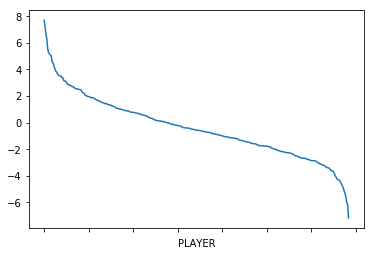

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

rpm.plot()

Producing the same chart for PER is a little bit more invovled, since we want to first sort our values to get the same type of curve:

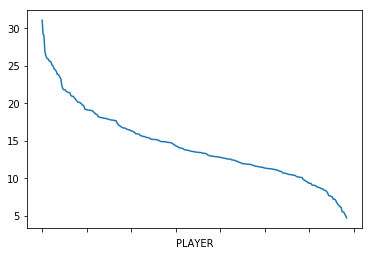

In [16]:
df_with_index['PER'].sort_values(ascending=False).plot()

Right off the bat, we can make a couple of observations. RPM has a symmetric distribution, which makes sense because it is rooted in point-differential data, and the point differiential across the entire league is 0. PER is much less symmetric, and it looks as if differences in production (as measured by PER) is much more pronounced at the top of the league than it is at the bottom. Pandas made the above analysis simple. 

But taking advantage of this simplicity requires pre-requisite knowledge. The above visual was so easy to create because under the hood, pandas used our series's index labels (the player names) as the x-axis values of our plot. Pandas is full of subtle details like this, which can equally annoying and confusing at times. But if you've made it this far, you're well on your way to understanding them.